In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np
from imageio import imread
import os
from matplotlib.transforms import Bbox
from skimage.transform import rescale, resize, downscale_local_mean

In [2]:
def file_name(file_dir, form='png'):
	file_list = []
	for root, dirs, files in os.walk(file_dir):
		for file in files:
			if os.path.splitext(file)[1] == '.' + form:
				file_list.append(os.path.join(root, file))
	return sorted(file_list)

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

In [29]:
# Create data
inp = (6, 1)
lime = (1.130434783,  4.913043478)
npe = (3.695652174, 3.652173913)
ours = (2.304347826, 2.782608696)
retinexnet = (2.869565217, 5.695652174)
srie = (4.956521739, 2.956521739)

inp_error = (0, 0)
lime_error = (0.344350222,  1.124643114)
npe_error = (0.558795995, 0.934621734)
ours_error = (0.822124886, 0.795242772)
retinexnet_error = (0.694415898, 0.470471969)
srie_error = (0.208514414, 0.87792425)

inp_var = (0, 0)
lime_var = (0.118577075, 1.264822134)
npe_var = (0.312252964, 0.873517787)
ours_var = (0.675889328, 0.632411067)
retinexnet_var = (0.482213439, 0.221343874)
srie_var = (0.043478261, 0.770750988)

In [32]:
data = (inp, lime, npe, ours, retinexnet, srie)
colors = ("red", "green", "blue", "C1", "purple", "tan")
groups = ("Input", "LIME", "NPE", "Ours", "RetinexNet", "SRIE")
error = (inp_error, lime_error, npe_error, ours_error, retinexnet_error, srie_error)
var = (inp_var, lime_var, npe_var, ours_var, retinexnet_var, srie_var)

/Users/gongxinyu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


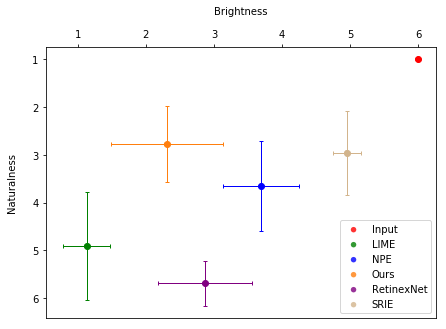

In [31]:
# Create plot
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# size = fig.get_size_inches()*fig.dpi

for data_point, color, group, error_point in zip(data, colors, groups, error):
    x, y = data_point
    x_err, y_err = error_point
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax.errorbar(x, y, xerr=x_err, yerr=y_err, c=color, elinewidth=1, fmt='o', capsize=2)
 
# plt.title('User Study Results',  loc='center')
# ax.set_title('User Study Results', y=-size)
plt.xlabel('Brightness', labelpad=15)
plt.ylabel('Naturalness', labelpad=15)
plt.gca().invert_yaxis()
plt.legend(loc=4)
# plt.show()
plt.savefig('user_study.eps', bbox_inches='tight', format='eps', dpi=1000)
# plt.savefig('user_study.png', bbox_inches='tight', dpi=1000)

/Users/gongxinyu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


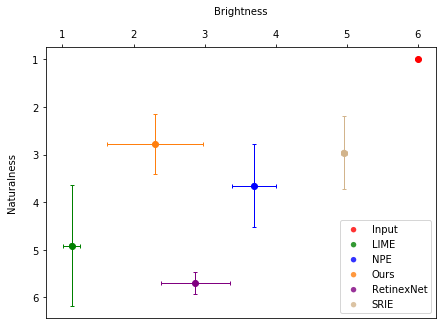

In [33]:
# Create plot
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# size = fig.get_size_inches()*fig.dpi

for data_point, color, group, var_point in zip(data, colors, groups, var):
    x, y = data_point
    x_var, y_var = var_point
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax.errorbar(x, y, xerr=x_var, yerr=y_var, c=color, elinewidth=1, fmt='o', capsize=2)
 
# plt.title('User Study Results',  loc='center')
# ax.set_title('User Study Results', y=-size)
plt.xlabel('Brightness', labelpad=15)
plt.ylabel('Naturalness', labelpad=15)
plt.gca().invert_yaxis()
plt.legend(loc=4)
# plt.show()
plt.savefig('user_study_v2.eps', bbox_inches='tight', format='eps', dpi=1000)
# plt.savefig('user_study.png', bbox_inches='tight', dpi=1000)

/Users/gongxinyu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


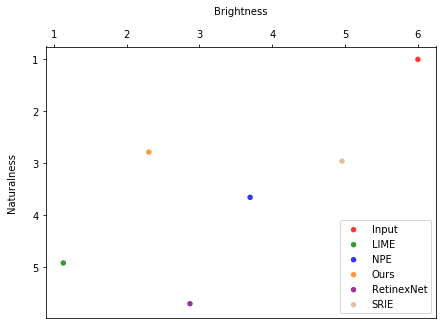

In [70]:
# Create plot
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# size = fig.get_size_inches()*fig.dpi

for data_point, color, group, var_point in zip(data, colors, groups, var):
    x, y = data_point
    x_var, y_var = var_point
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group, marker='o')
#     ax.errorbar(x, y, xerr=x_var, yerr=y_var, c=color, elinewidth=1, fmt='o', capsize=2)
 
# plt.title('User Study Results',  loc='center')
# ax.set_title('User Study Results', y=-size)
plt.xlabel('Brightness', labelpad=15)
plt.ylabel('Naturalness', labelpad=15)
plt.gca().invert_yaxis()
plt.legend(loc=4)
# plt.show()
plt.savefig('user_study_v3.eps', bbox_inches='tight', format='eps', dpi=1000)
# plt.savefig('user_study.png', bbox_inches='tight', dpi=1000)

/Users/gongxinyu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


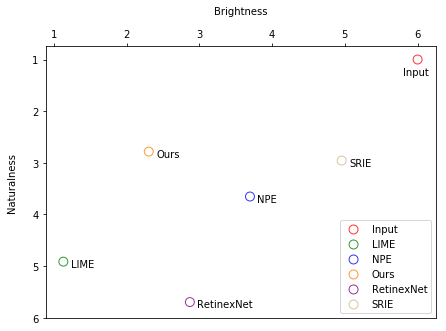

In [101]:
# Create plot
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# size = fig.get_size_inches()*fig.dpi

for data_point, color, group, var_point in zip(data, colors, groups, var):
    x, y = data_point
    x_var, y_var = var_point
    ax.scatter(x, y, alpha=0.8, edgecolors=color, facecolors='none', s=80, label=group)

    if group != 'Input':
        ax.annotate(group, (x+0.1, y+0.1))
    else:
        ax.annotate(group, (x-0.2, y+0.3))
 
# plt.title('User Study Results',  loc='center')
# ax.set_title('User Study Results', y=-size)
plt.xlabel('Brightness', labelpad=15)
plt.ylabel('Naturalness', labelpad=15)
plt.gca().invert_yaxis()
plt.legend(loc=4)
# plt.show()
plt.savefig('user_study_v4.eps', bbox_inches='tight', format='eps', dpi=1000)
# plt.savefig('user_study.png', bbox_inches='tight', dpi=1000)

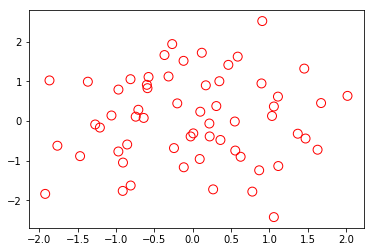

In [100]:
x = np.random.randn(60) 
y = np.random.randn(60)

plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
plt.show()

(340, 512, 3)


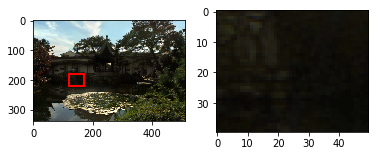

In [98]:
x, y, w, h = 120, 180, 50, 40
img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/ChineseGarden'
img_names = file_name(img_path)
img = imread(img_names[0])
print(np.shape(img))

# Create figure and axes
# plt.subplot(121)
fig1,(ax1,ax2) = plt.subplots(1,2)

# Display the image
ax1.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)

# plt.subplot(122)

ax2.imshow(img[y:y+h, x:x+w, :])

plt.show()

In [4]:
# lsgan -> 5_4_lsgan -> 5_4_ragan_lsgan -> attention_5_4_ragan_lsgan -> vary_attention_5_4_ragan_lsgan
exps = ['input.png','lsgan.png', '5_4_lsgan.png', '5_4_ragan_lsgan.png', 'attention_5_4_ragan_lsgan.png', 'vary_attention_5_4_ragan_lsgan.png']

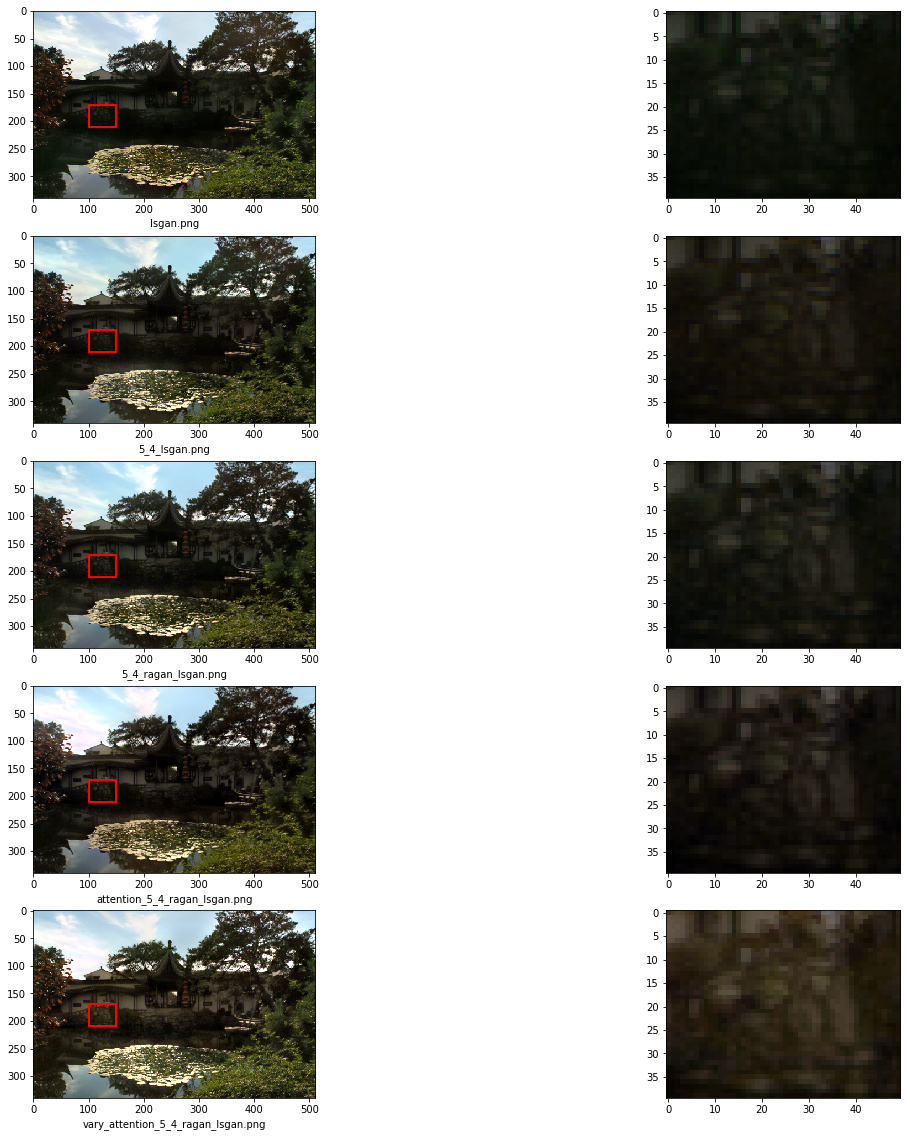

In [124]:
x, y, w, h = 100, 170, 50, 40
img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/ChineseGarden/'
# img_names = file_name(img_path)
img_names = []
for exp in exps:
    img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 2, i*2+1)
    img = imread(img_name)
    hdl = ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect)
    ax2 = fig.add_subplot(len(img_names), 2, i*2+2)
    ax2.imshow(img[y:y+h, x:x+w, :])

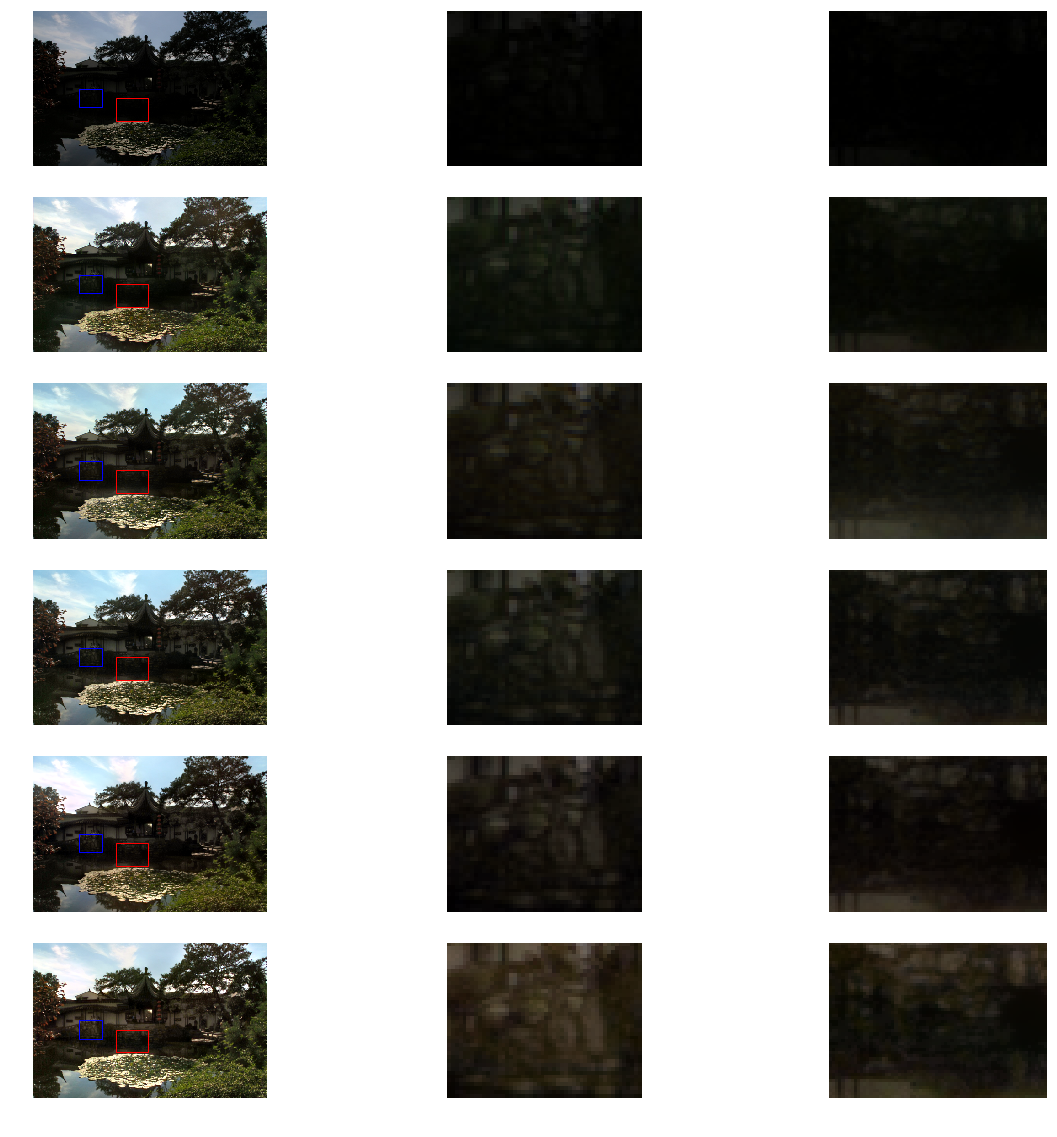

In [17]:
x1, y1, w1, h1 = 100, 170, 50, 40
x2, y2, w2, h2 = 180, 190, 70, 50

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/ChineseGarden/'
# img_names = file_name(img_path)
img_names = []
for exp in exps:
    img_names.append(img_path+exp)
figsize = (20, 20)
fig = plt.figure(figsize=figsize)
# margins = {  #     vvv margin in inches
#     "left"   :     1.5 / figsize[0],
#     "bottom" :     0.8 / figsize[1],
#     "right"  : 1 - 0.3 / figsize[0],
#     "top"    : 1 - 1   / figsize[1]
# }
# fig.subplots_adjust(**margins)
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=1,edgecolor='b',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1,
    pad_inches = 0)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2,
    pad_inches = 0)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3,
    pad_inches = 0)

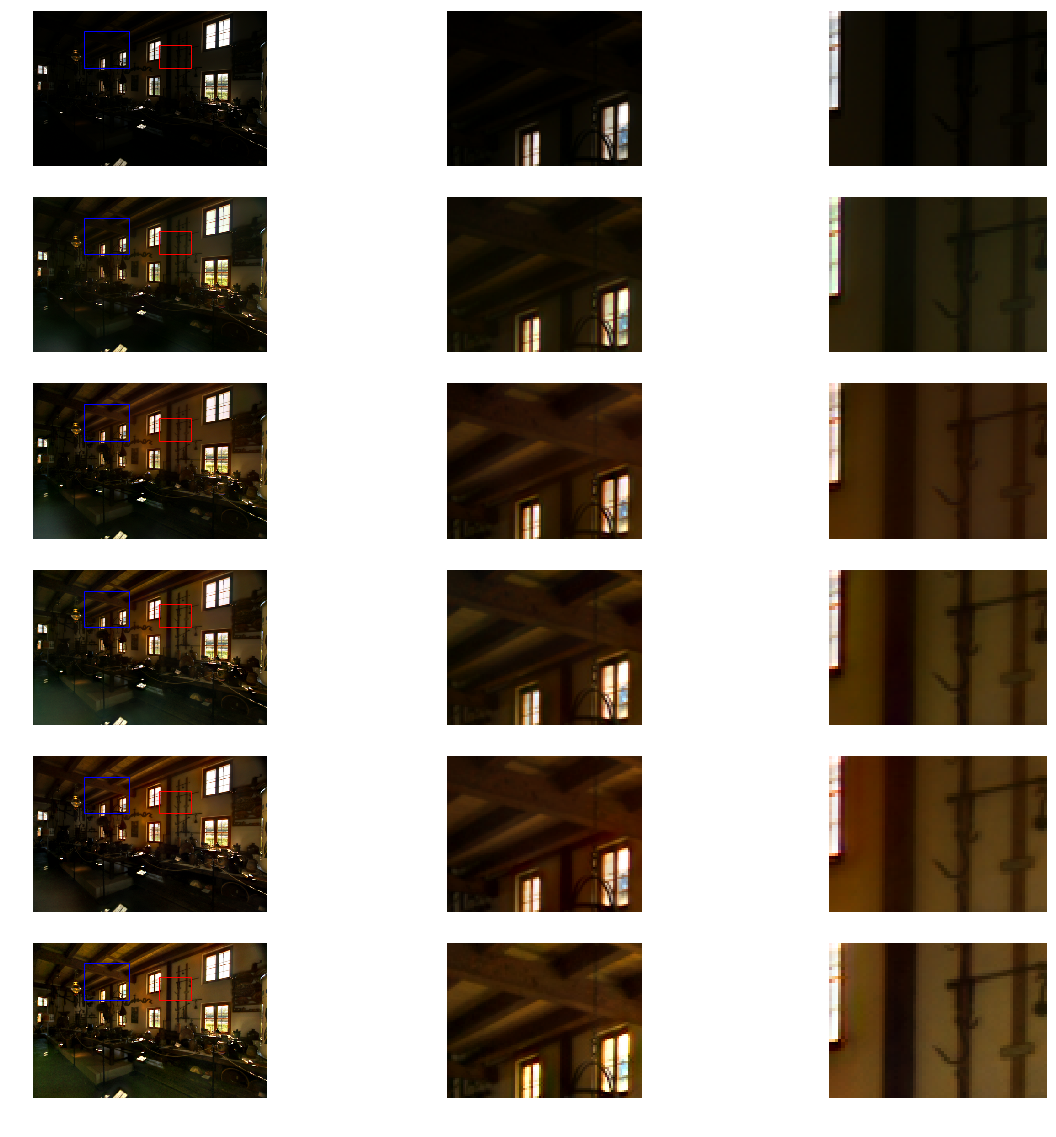

In [8]:
x1, y1, w1, h1 = 110, 45, 100, 80
x2, y2, w2, h2 = 275, 75, 70, 50

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/Farmhouse/'
# img_names = file_name(img_path)
img_names = []
for exp in exps:
    img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=1,edgecolor='b',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

In [6]:
# os.path.join(img_path, 'bbox', )
os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.eps')

'/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/Farmhouse/bbox/input_p2.eps'

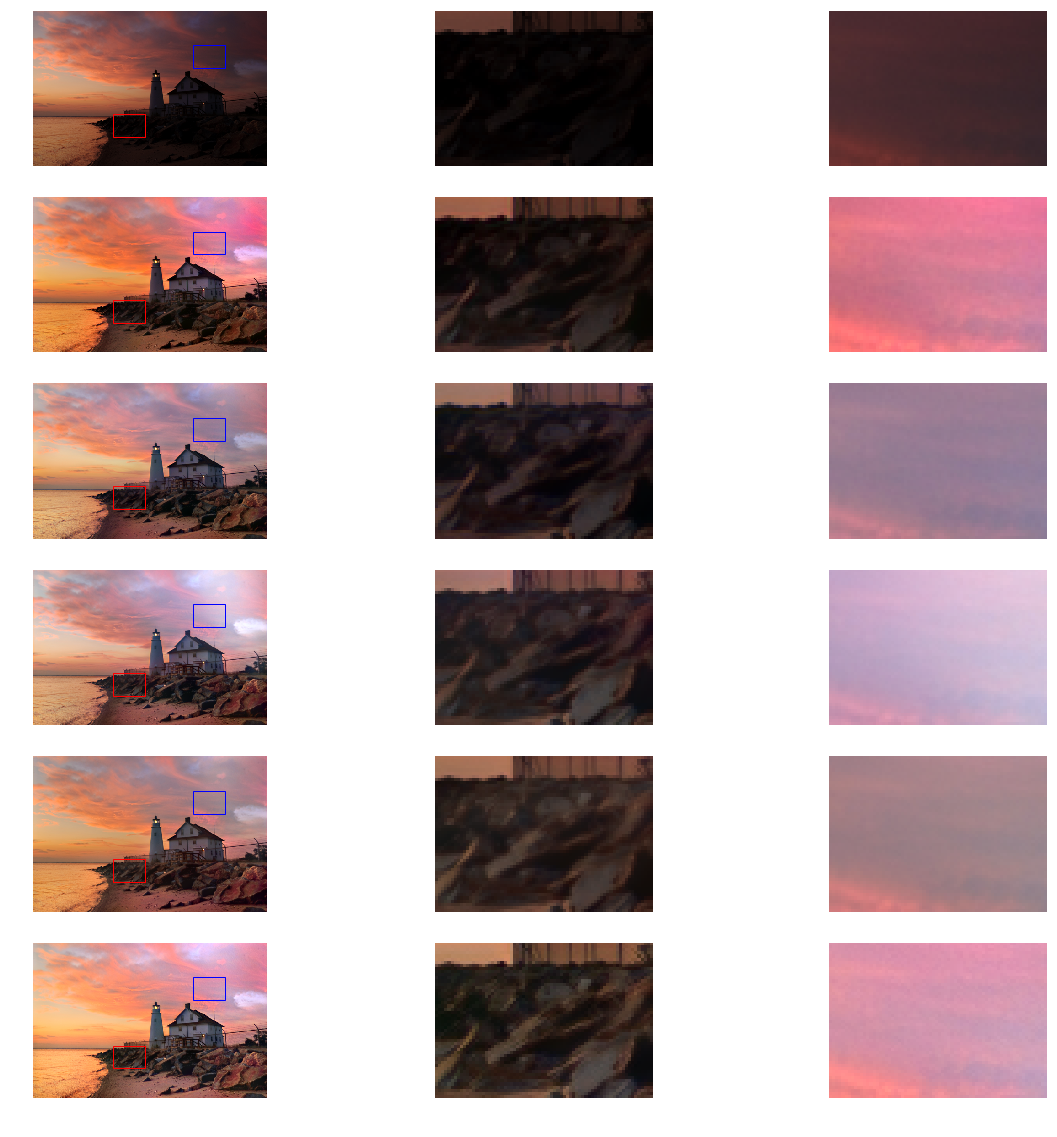

In [18]:
x1, y1, w1, h1 = 175, 225, 70, 50
x2, y2, w2, h2 = 350, 75, 70, 50

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/LightHouse/'
# img_names = file_name(img_path)
img_names = []
for exp in exps:
    img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=1,edgecolor='b',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

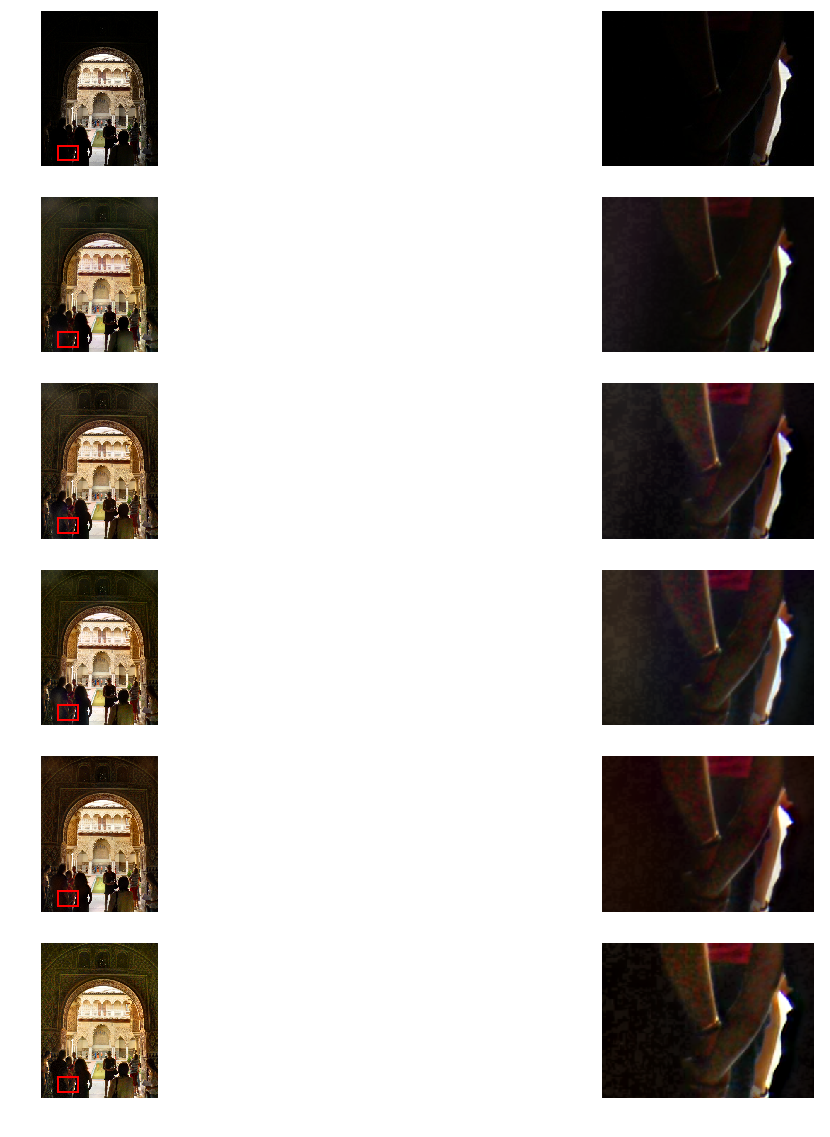

In [19]:
x1, y1, w1, h1 = 250, 2000, 300, 220
x2, y2, w2, h2 = 350, 75, 70, 50

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/ablation/P1010676/'
# img_names = file_name(img_path)
img_names = []
for exp in exps:
    img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 2, i*2+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 2, i*2+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p'+'.png'), dpi=1000, bbox_inches=extent2)
    
#     ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
#     ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])

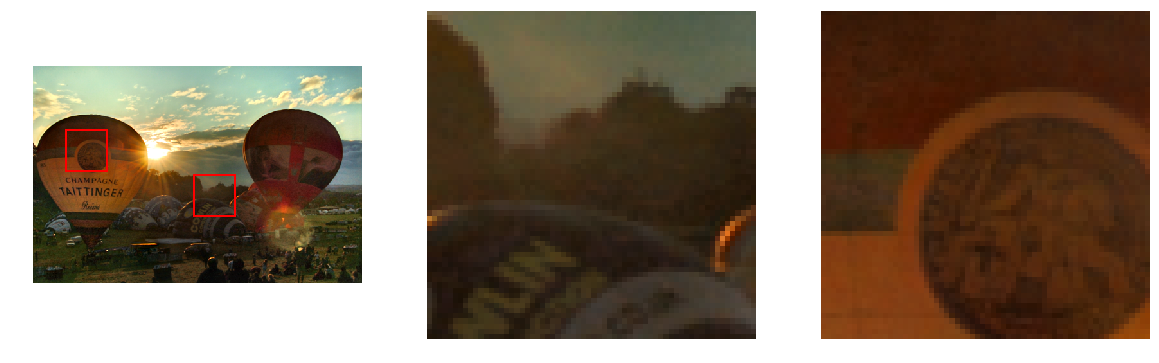

In [23]:
x1, y1, w1, h1 = 250, 170, 64, 64
x2, y2, w2, h2 = 50, 100, 64, 64
# img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/sample/'
img_names = ['/Users/gongxinyu/Desktop/ComputerScience/yifan/sample/Balloons_fake_B.png']
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
#     plt.savefig('sample_%d.eps'%i, bbox_inches='tight', format='eps')
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('fake_sample_1_%d.png'%i, bbox_inches=extent1, dpi=300)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('fake_sample_2_%d.png'%i, bbox_inches=extent2, dpi=300)
#     plt.savefig('user_study.eps', bbox_inches='tight', format='eps', dpi=1000)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('fake_sample_3_%d.png'%i, bbox_inches=extent3, dpi=300)

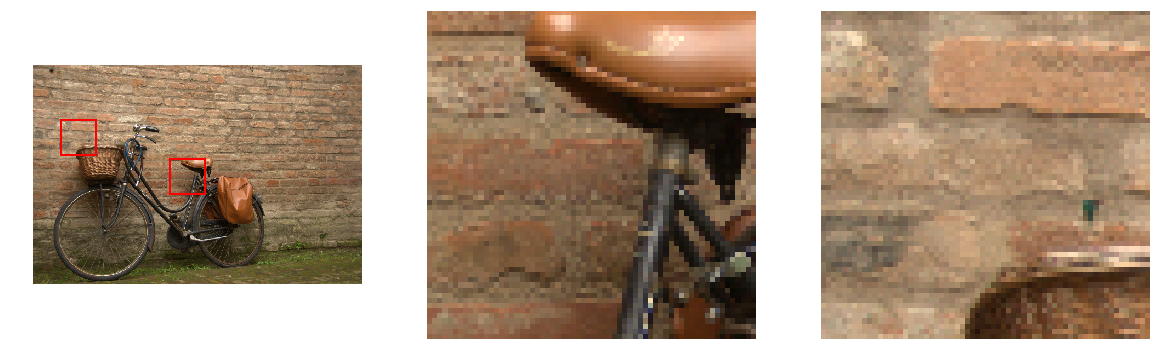

In [22]:
x1, y1, w1, h1 = 250, 170, 64, 64
x2, y2, w2, h2 = 50, 100, 64, 64
# img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/sample/'
img_names = ['/Users/gongxinyu/Desktop/ComputerScience/yifan/sample/pastedImage0.png']
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
#     plt.savefig('sample_%d.eps'%i, bbox_inches='tight', format='eps')
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=2,edgecolor='r',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('real_sample_1_%d.png'%i, bbox_inches=extent1, dpi=300)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('real_sample_2_%d.png'%i, bbox_inches=extent2, dpi=300)
#     plt.savefig('user_study.eps', bbox_inches='tight', format='eps', dpi=1000)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('real_sample_3_%d.png'%i, bbox_inches=extent3, dpi=300)

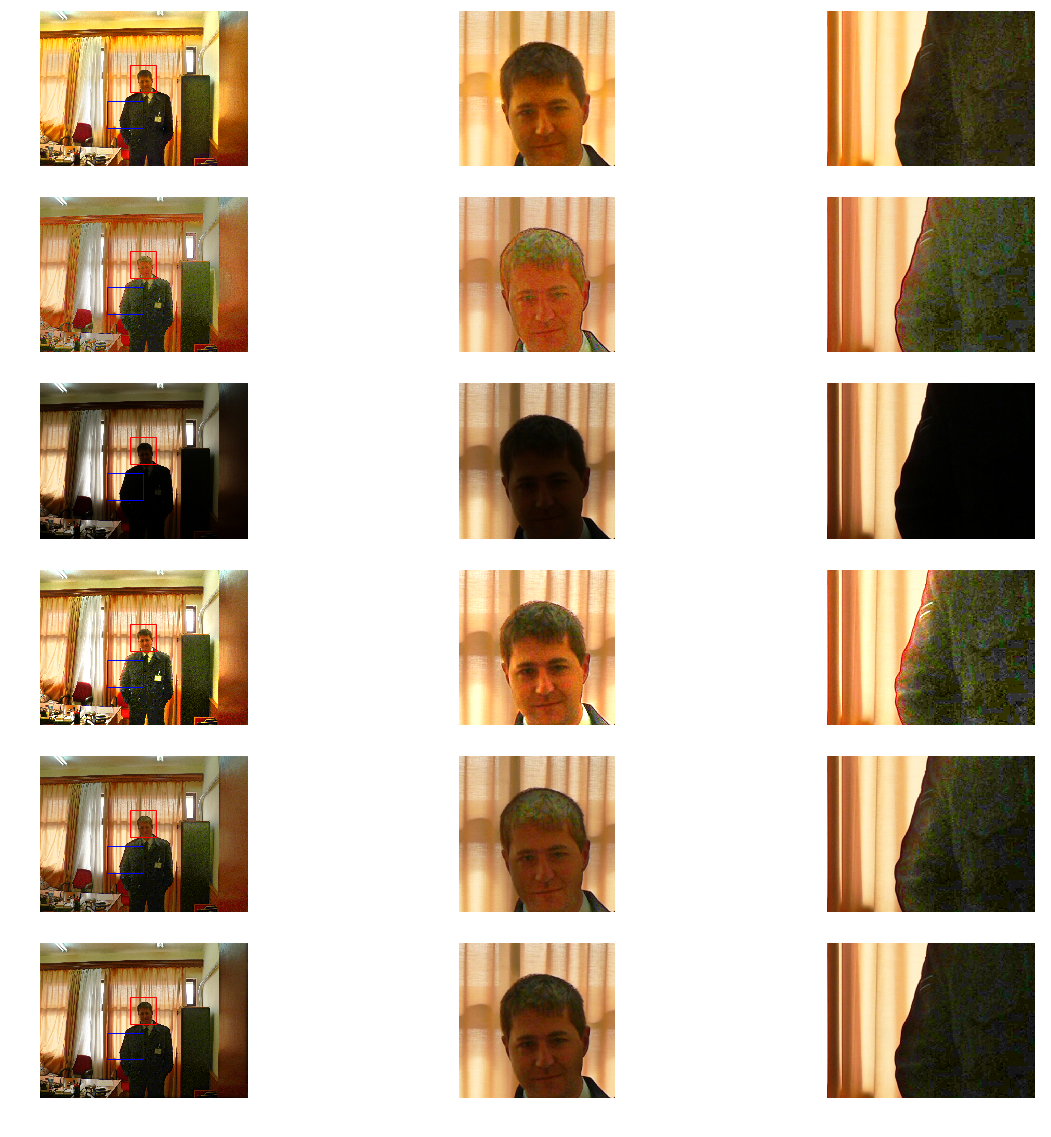

In [4]:
x1, y1, w1, h1 = 1000, 600, 300, 300
x2, y2, w2, h2 = 750, 1000, 400, 300

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/compare_pdf/P1040134/'
img_names = file_name(img_path)
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=1,edgecolor='b',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

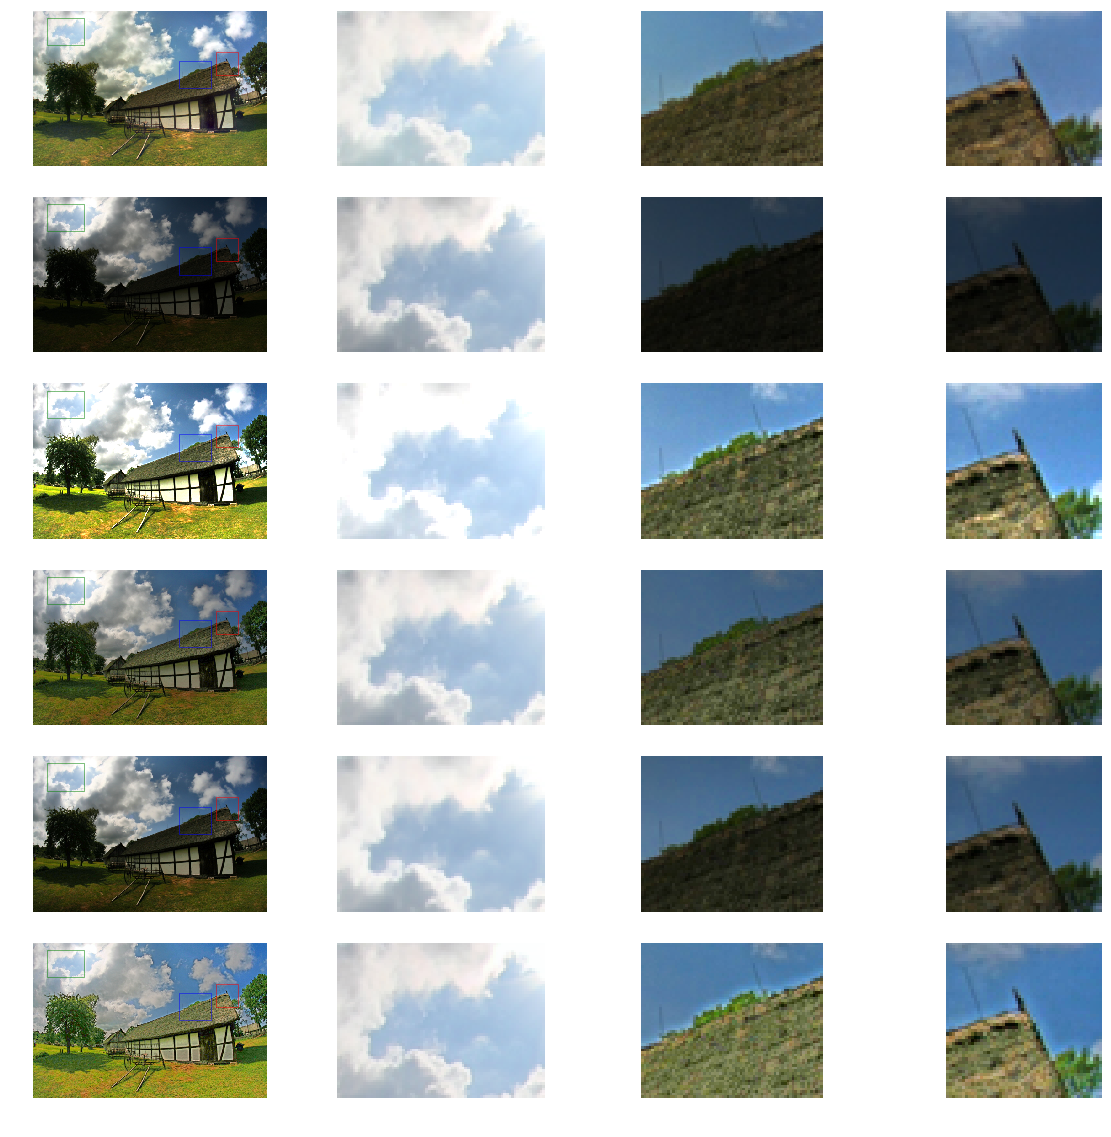

In [17]:
x1, y1, w1, h1 = 30, 15, 80, 60
x2, y2, w2, h2 = 320, 110, 70, 60
x3, y3, w3, h3 = 400, 90, 50, 50

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/compare_pdf/Kluki/'
img_names = file_name(img_path)
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 4, i*4+1)
    img = imread(img_name)
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=0.5,edgecolor='g',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=0.5,edgecolor='b',facecolor='none')
    ax1.add_patch(rect2)
    rect3 = patches.Rectangle((x3,y3),w3,h3,linewidth=0.5,edgecolor='r',facecolor='none')
    ax1.add_patch(rect3)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 4, i*4+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 4, i*4+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

    ax4 = fig.add_subplot(len(img_names), 4, i*4+4)
    plt.axis('off')
    ax4.imshow(img[y3:y3+h3, x3:x3+w3, :])
    extent4 = full_extent(ax4).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p3'+'.png'), dpi=1000, bbox_inches=extent4)



/Users/gongxinyu/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


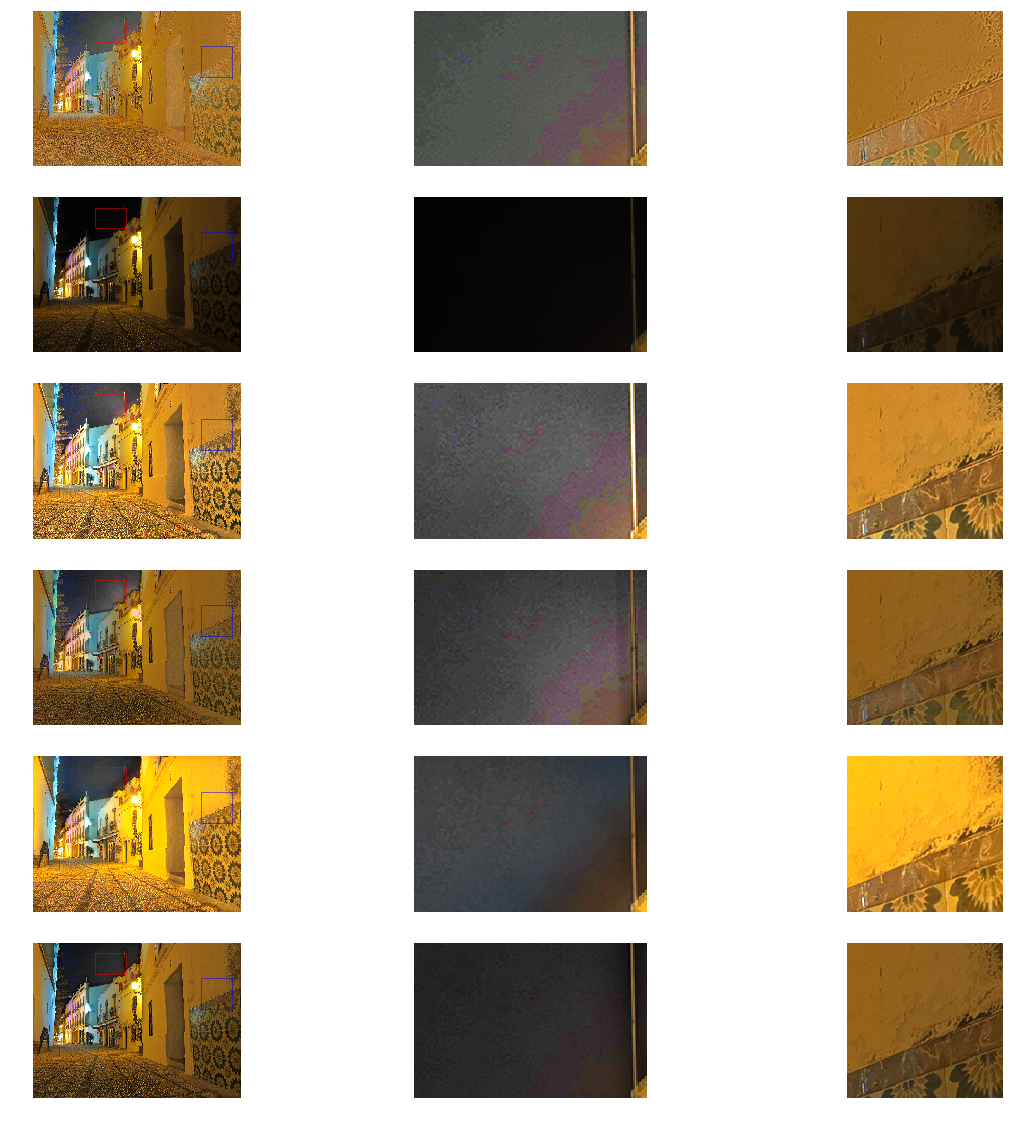

In [17]:
x1, y1, w1, h1 = 300, 50, 150, 100
x2, y2, w2, h2 = 810, 170, 150, 150

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/compare_pdf/5/'
img_names = file_name(img_path)
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
    if 'input' in img_name:
        img = resize(img, (750, 1000))
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=0.5,edgecolor='r',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=0.5,edgecolor='b',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

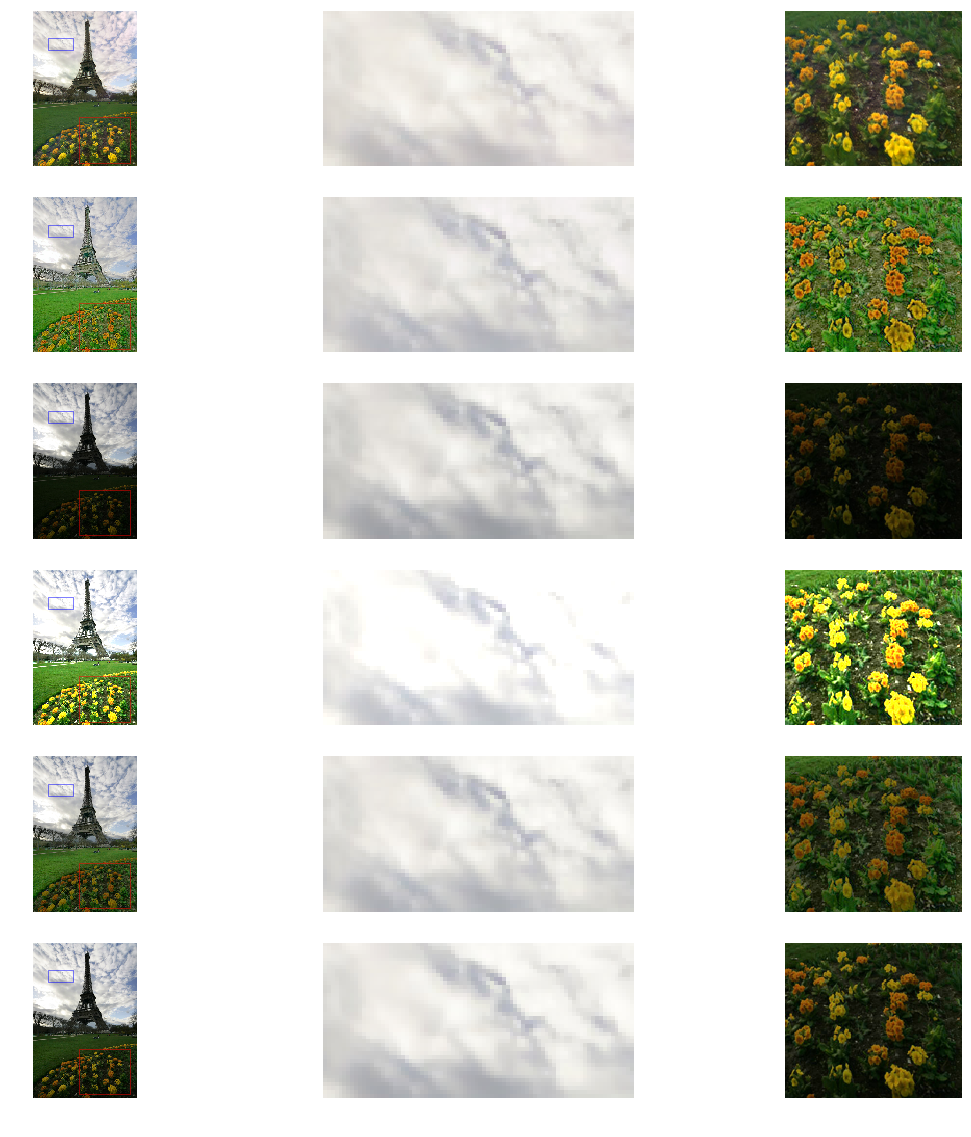

In [33]:
# x1, y1, w1, h1 = 50, 90, 80, 40
x1, y1, w1, h1 = 50, 90, 80, 40
x2, y2, w2, h2 = 150, 350, 170, 150

img_path = '/Users/gongxinyu/Desktop/ComputerScience/yifan/compare_pdf/Tower/'
img_names = file_name(img_path)
# img_names = []
# for exp in exps:
#     img_names.append(img_path+exp)
fig = plt.figure(figsize=(20, 20))
for i, img_name in enumerate(img_names):
    ax1 = fig.add_subplot(len(img_names), 3, i*3+1)
    img = imread(img_name)
#     if 'input' in img_name:
#         img = resize(img, (750, 1000))
    plt.axis('off')
    ax1.imshow(img)
    plt.xlabel(img_name.split('/')[-1])
    rect1 = patches.Rectangle((x1,y1),w1,h1,linewidth=0.5,edgecolor='b',facecolor='none')
    ax1.add_patch(rect1)
    rect2 = patches.Rectangle((x2,y2),w2,h2,linewidth=0.5,edgecolor='r',facecolor='none')
    ax1.add_patch(rect2)
    extent1 = full_extent(ax1).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_bbox'+'.png'), dpi=1000, bbox_inches=extent1)
    
    ax2 = fig.add_subplot(len(img_names), 3, i*3+2)
    plt.axis('off')
    ax2.imshow(img[y1:y1+h1, x1:x1+w1, :])
    extent2 = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p1'+'.png'), dpi=1000, bbox_inches=extent2)
    
    ax3 = fig.add_subplot(len(img_names), 3, i*3+3)
    plt.axis('off')
    ax3.imshow(img[y2:y2+h2, x2:x2+w2, :])
    extent3 = full_extent(ax3).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(img_path, 'bbox', img_name.split('/')[-1].split('.')[0]+'_p2'+'.png'), dpi=1000, bbox_inches=extent3)

In [19]:
np.shape(img)

(512, 341, 3)